<a href="https://colab.research.google.com/github/mahdikarami8484/forest-burning/blob/master/Forest_burning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
H, W = 1024, 1024

burn_rate = 0.1

delta_t = 60

time = 24*60*60

tree_density = 0.7

N = W*H*tree_density

In [ ]:
img = Image.open("forest.png")
gray = img.convert("L")
gray = gray.resize((H, W))
arr = np.array(gray)

In [ ]:
threshold = 100
forest = np.zeros((H, W, 3))
forest[:, :, 0] = (arr < threshold).astype(int)
forest[:, :, 1] = np.random.rand(H, W)
old_forest = forest[:, :, 0].copy()

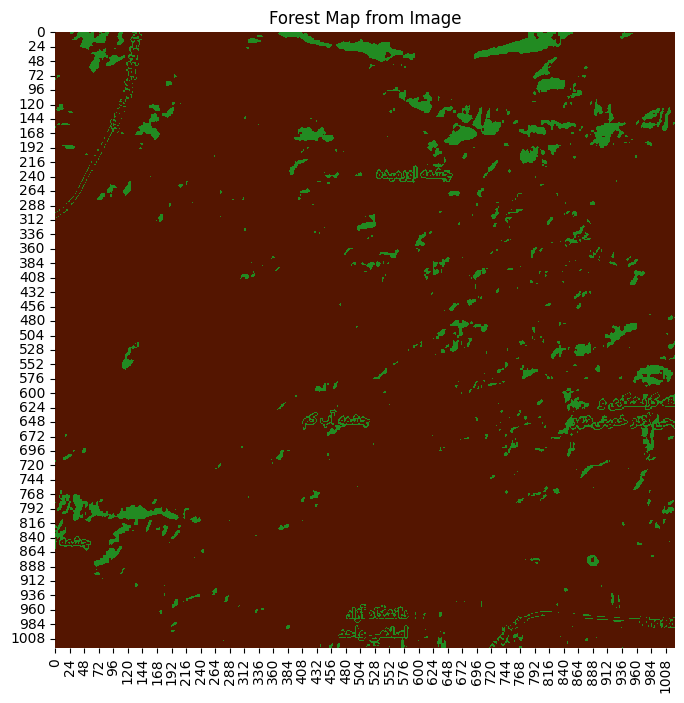

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap=['#541500', '#228B22']
plt.figure(figsize=(8,8))
sns.heatmap(forest[:, :, 0], cmap=cmap, annot=False, cbar=False)
plt.title("Forest Map from Image")
plt.show()

In [ ]:
# forest = np.zeros((H, W, 3))
# forest[:, :, 0] = np.random.choice([0, 1], size=(H, W), p=[1-tree_density, tree_density])
# forest[:, :, 1] = np.random.rand(H, W)
# old_forest = forest[:, :, 0].copy()

In [ ]:
ignite_time = np.full_like(forest[:, :, 0], np.nan)

In [ ]:
def get_P():
  return 0.3

In [ ]:
def get_4_neighbors(matrix, r, c):
    rows, cols = matrix.shape
    neighbors = []

    deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for dr, dc in deltas:
        nr, nc = r + dr, c + dc

        if 0 <= nr < rows and 0 <= nc < cols:
            neighbors.append([nr, nc])

    return neighbors

In [ ]:
# while(True):
#   r_index = np.random.randint(0, H)
#   c_index = np.random.randint(0, W)

#   if(forest[c_index, r_index, 0] == 0):
#     continue

#   forest[r_index, c_index, 0] = 2
#   ignite_time[r_index, c_index] = 0
#   break;

In [ ]:
forest[600:605, 590:600, 0] = 2

In [ ]:
np.argwhere(forest == 2)

array([[600, 590,   0],
       [600, 591,   0],
       [600, 592,   0],
       [600, 593,   0],
       [600, 594,   0],
       [600, 595,   0],
       [600, 596,   0],
       [600, 597,   0],
       [600, 598,   0],
       [600, 599,   0],
       [601, 590,   0],
       [601, 591,   0],
       [601, 592,   0],
       [601, 593,   0],
       [601, 594,   0],
       [601, 595,   0],
       [601, 596,   0],
       [601, 597,   0],
       [601, 598,   0],
       [601, 599,   0],
       [602, 590,   0],
       [602, 591,   0],
       [602, 592,   0],
       [602, 593,   0],
       [602, 594,   0],
       [602, 595,   0],
       [602, 596,   0],
       [602, 597,   0],
       [602, 598,   0],
       [602, 599,   0],
       [603, 590,   0],
       [603, 591,   0],
       [603, 592,   0],
       [603, 593,   0],
       [603, 594,   0],
       [603, 595,   0],
       [603, 596,   0],
       [603, 597,   0],
       [603, 598,   0],
       [603, 599,   0],
       [604, 590,   0],
       [604, 591

In [ ]:
np.argwhere(ignite_time == 0)

array([], shape=(0, 2), dtype=int64)

In [ ]:
i = 0
while(i*delta_t < time):
  # if(np.argwhere(forest == 2).shape[0] >= N):
  #   break

  for tree in np.argwhere(forest == 2):
    r = tree[0]
    c = tree[1]
    neighbors = get_4_neighbors(forest[:, :, 0], r, c)
    for neighbor in neighbors:
      nr = neighbor[0]
      nc = neighbor[1]

      if(forest[nr, nc, 0] == 0 or forest[nr, nc, 0] == 3):
        continue

      state = np.random.choice([1, 2], p=[1-get_P(), get_P()])

      if(state != 2):
        continue

      forest[nr, nc, 0] = 2

      if np.isnan(ignite_time[nr, nc]):
        ignite_time[nr, nc] = i

    forest[r, c, 1] -= burn_rate
    if(forest[r, c, 1] < 0):
      forest[r, c, 0] = 3
  i+=1

In [ ]:
forest[:, :, 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.argwhere(forest == 2)

array([], shape=(0, 3), dtype=int64)

In [ ]:
ignite_time*delta_t

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
old_forest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import pandas as pd

In [ ]:
forest_labels = pd.DataFrame(forest[:, :, 0])
forest_labels = forest_labels.replace({0:'soil', 1:'tree', 2:'fire', 3:'burned'})
forest_labels

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
1,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
2,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
3,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
4,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
1020,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
1021,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil
1022,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil,...,soil,soil,soil,soil,soil,soil,soil,soil,soil,soil


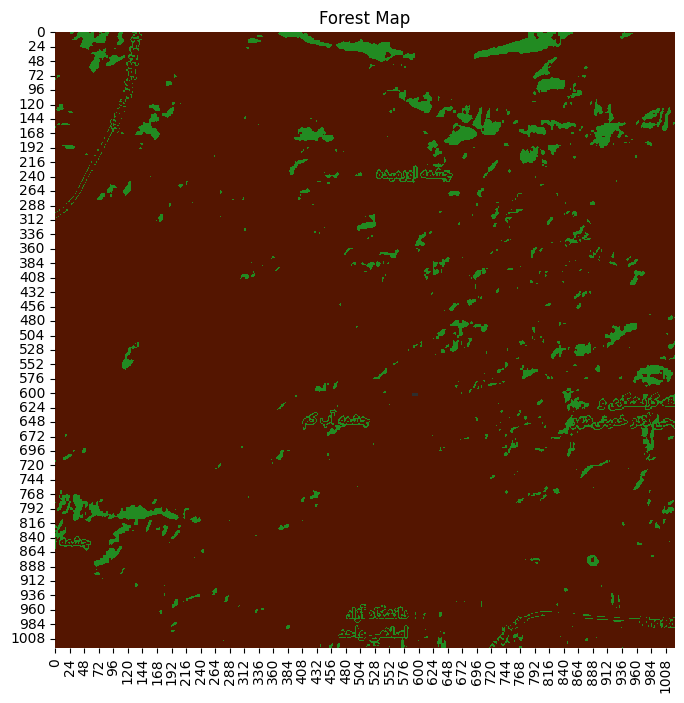

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

forest_num = forest[:, :, 0].copy()
cmap = ['#541500', '#228B22', '#FF0000', '#2E2E2E']

plt.figure(figsize=(8,8))
sns.heatmap(forest_num, cmap=cmap, annot=False, cbar=False)
plt.title("Forest Map")
plt.show()